## Exploring Images From Camelyon Dataset

In [163]:
import openslide
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import glob
import math
%matplotlib inline

In [2]:
path = '/Users/simongraham/Desktop/Summer Project'

In [3]:
images_tissue = glob.glob(path+"/Images/Normal/Normal_00[0-9].tif")
images_mask = glob.glob(path+"/normal_1-10/Normal_00[0-9].png")

In [4]:
num_images = 9
tissue = []

for i in range(num_images):
    tissue.append(openslide.OpenSlide(images_tissue[i]))
    
num_masks = 9
mask = []

for i in range(num_masks):
    mask.append(mpimg.imread(images_mask[i]))


First we create an Openslide Object

Now, we shall explore what data we are dealing with:

In [7]:
print('Number of levels:', tissue[0].level_count)
print('Level dimensions:', tissue[0].level_dimensions)
print('Level downsamples:', tissue[0].level_downsamples)

Number of levels: 10
Level dimensions: ((97792, 221184), (48896, 110592), (24448, 55296), (12224, 27648), (6112, 13824), (3056, 6912), (1528, 3456), (764, 1728), (382, 864), (191, 432))
Level downsamples: (1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0)


In [8]:
print('Number of levels:', tissue[1].level_count)
print('Level dimensions:', tissue[1].level_dimensions)
print('Level downsamples:', tissue[1].level_downsamples)

Number of levels: 10
Level dimensions: ((97792, 221184), (48896, 110592), (24448, 55296), (12224, 27648), (6112, 13824), (3056, 6912), (1528, 3456), (764, 1728), (382, 864), (191, 432))
Level downsamples: (1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0)


Here, we can see that we have a pyramid structre of images with 10 levels, where 0 has the highest level of resolution. We shall now explore some our first image with different levels of resolution.

Level 7, Image Normal 001


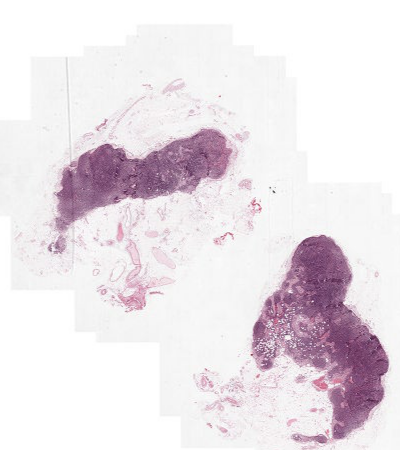

In [9]:
print('Level 7, Image Normal 001')
tissue[0].read_region((25000,70000),7,(400,450))

Level 7, Image Normal 002


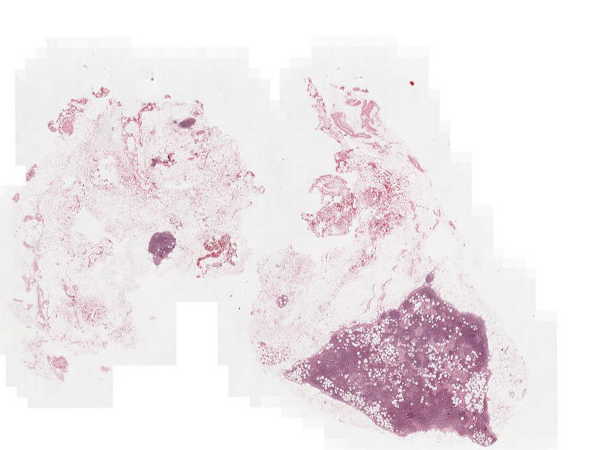

In [10]:
print('Level 7, Image Normal 002')
tissue[1].read_region((15000,105000),7,(600,450))

Now that we have viewed the image at levels 7 and 9. Lets have a closer look at the tissue at levels 0 and 1.

Level 1


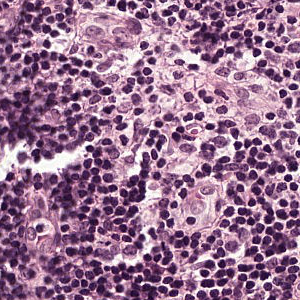

In [11]:
print('Level 1')
tissue[0].read_region((45000,90000),1,(300,300))

Level 0


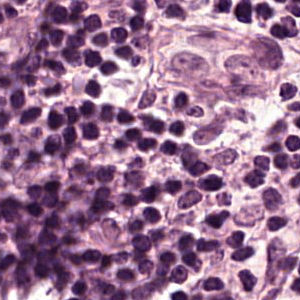

In [12]:
print('Level 0')
tissue[0].read_region((45000,90000),0,(300,300))

Now that we can see what our image looks like, we need to create patches to feed in to a network. This is done due to the large amount of redundancy in our images. 

We can read the openslide image as a numpy array and can then show the image using plt.imshow() :

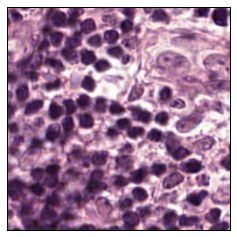

In [232]:
img = tissue[0].read_region((45000,90000),0,(256,256))
img2 = np.asarray(img)

fig = plt.imshow(img2);
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.show()

Level 9, Image Normal 001 and corresponding mask


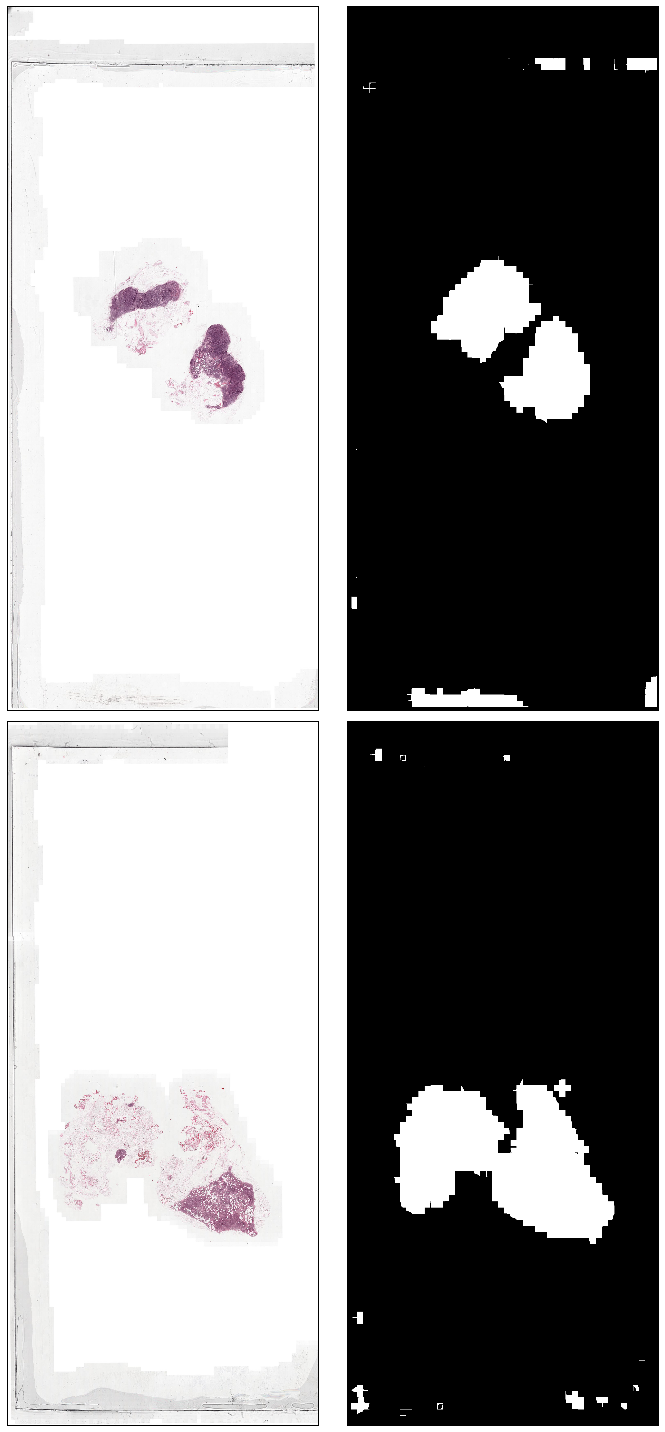

In [14]:
print('Level 9, Image Normal 001 and corresponding mask')
image_1 = np.asarray(tissue[0].read_region((0,0),6,(1528, 3456)))
image_2 = np.asarray(tissue[1].read_region((0,0),6,(1528, 3456)))


fig = plt.figure(figsize=(10,20))

ax1 = fig.add_subplot(221)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.imshow(image_1, cmap = 'Greys_r')

ax2 = fig.add_subplot(222)
ax2.imshow(mask[0], cmap = "Greys_r")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3 = fig.add_subplot(223)
ax3.imshow(image_2, cmap = 'Greys_r')
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax4 = fig.add_subplot(224)
ax4.imshow(mask[1], cmap = "Greys_r")
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

Above we can see that at the edges of the mask image, there are some regions that have falsely identified tissue. Therefore, close to the boundary, we should ensure that the mask gives a pixel value of 0.

In [28]:
def cleanMask(mask):
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if i < 400 or i> 3000:     # Picked these values after observing slides- seemed sensible
                mask[i][j] = 0
            if j < 200 or j > 1300:
                mask[i][j] = 0
                    
    return mask

for i in range(num_masks):
    cleanMask(mask[i])

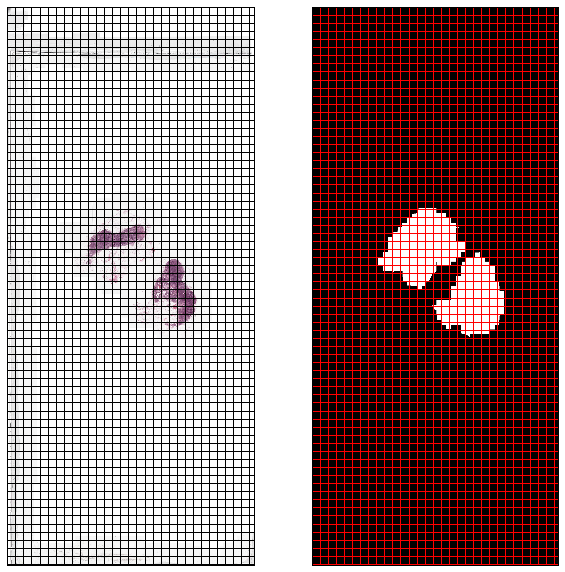

In [132]:
image_1 = np.asarray(tissue[0].read_region((0,0),6,(1528, 3456)))
tileSize = 50

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121)
ax1 = plt.gca()
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.imshow(image_1)

for i in range(0, image_1.shape[1], tileSize):
    ax1.axvline(x=i, ymin=0, ymax=1, linewidth=1, color='k')
for j in range(0, image_1.shape[0], tileSize):
    ax1.axhline(y=j, xmin=0, xmax= image_1.shape[0],linewidth=1, color='k')


ax2 = fig.add_subplot(122)
ax2 = plt.gca()
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.imshow(mask[0], cmap="Greys_r")

for i in range(0, mask[0].shape[1], tileSize):
    ax2.axvline(x=i, ymin=0, ymax=10, linewidth=1, color='r')
for j in range(0, mask[0].shape[0], tileSize):
    ax2.axhline(y=j, xmin=0, xmax= mask[0].shape[1],linewidth=1, color='r')

plt.draw()
plt.show()



Now we need to create code to be able to extract the tiles that contain only tissue. We observe that the masks do not take in to account the density of tissue present. Can these masks be improved? Consider using Otsu's method.

In [258]:
def getTile(mask,x,y):
    maskTile = mask[y : y + tileSize, x : x + tileSize]
    return maskTile

def selectTiles(mask):
    selectedTiles = []
    for i in range(0, mask.shape[1], tileSize):
        for j in range(0, mask.shape[0], tileSize):
            if (np.sum(getTile(mask,i,j))/(tileSize*tileSize)) == 1:
                selectedTiles.append((i,j))
    return selectedTiles


83


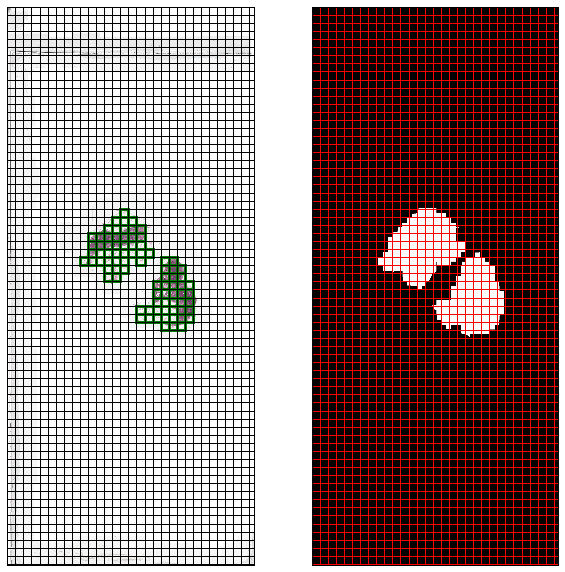

In [259]:
image_1 = np.asarray(tissue[0].read_region((0,0),6,(1528, 3456)))
tileSize = 50

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121)
ax1 = plt.gca()
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.imshow(image_1)

for i in range(0, image_1.shape[1], tileSize):
    ax1.axvline(x=i, ymin=0, ymax=1, linewidth=1, color='k')
for j in range(0, image_1.shape[0], tileSize):
    ax1.axhline(y=j, xmin=0, xmax= image_1.shape[0],linewidth=1, color='k')


ax2 = fig.add_subplot(122)
ax2 = plt.gca()
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.imshow(mask[0], cmap="Greys_r")

for i in range(0, mask[0].shape[1], tileSize):
    ax2.axvline(x=i, ymin=0, ymax=10, linewidth=1, color='r')
for j in range(0, mask[0].shape[0], tileSize):
    ax2.axhline(y=j, xmin=0, xmax= mask[0].shape[1],linewidth=1, color='r')

# Draw a box
count = len(selectTiles(mask[0]))
print(count)
for i in range(count):
    width, height = 50, 50
    ax1.add_patch(mpatches.Rectangle(selectTiles(mask[0])[i], width, height, facecolor="none",
        edgecolor="green", linewidth=3))


plt.draw()
plt.show()


In [260]:
numberPatches = 1000
sizePatch = 256
size_tile_level_0 = 3200
tile_coordinate_range = size_tile_level_0 - sizePatch

def get_patch_coordinates(mask):
    patch_coordinates = []
    tiles = np.asarray(selectTiles(mask))
    tiles_level_0 = tiles * 64     # 64 due to multiplying by scale factor 2 as increase resolution
    num_tiles = len(tiles)
    n_patches_in_tile = math.ceil(numberPatches / num_tiles)
    for tile in range(num_tiles):
        x = tiles_level_0[tile][0]
        y = tiles_level_0[tile][1]
        for patch in range(n_patches_in_tile):
            x_random = random.randint(0,tile_coordinate_range)
            y_random = random.randint(0,tile_coordinate_range)
            patch_x = x + x_random
            patch_y = y + y_random
            patch_coordinates.append((patch_x, patch_y))
    return patch_coordinates




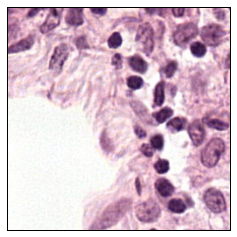

In [261]:
number = len(get_patch_coordinates(mask[0]))
rand = random.randint(0,number-1)
x,y = get_patch_coordinates(mask[0])[rand]

img = tissue[0].read_region((x,y),0,(256,256))
img2 = np.asarray(img)

fig = plt.imshow(img2);
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.show()


Now, we aim to create a class to make things a little neater